In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam
# from tensorflow.keras.utils import to_categorical
# from keras.layers import Dropout, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
# import cv2
# from sklearn.model_selection import train_test_split
# import pickle
# import os
# import pandas as pd
# import random
# from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import os
import pandas as pd
import random

In [2]:
# Parameters
path = "Dataset"  # Folder containing the dataset
labelFile = 'labels.csv'  # CSV file containing labels
batch_size_val = 32
epochs_val = 50
imageDimensions = (32, 32, 3)  # Input image dimensions (Height, Width, Channels)
testRatio = 0.2  # Ratio of test data
validationRatio = 0.2  # Ratio of validation data

In [3]:
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes...")

Total Classes Detected: 43
Importing Classes...


In [4]:
for count, class_dir in enumerate(myList):
    imgList = os.listdir(os.path.join(path, str(count)))
    for img_name in imgList:
        curImg = cv2.imread(os.path.join(path, str(count), img_name))
        curImg = cv2.resize(curImg, (imageDimensions[0], imageDimensions[1]))
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
print()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 


In [18]:
images = np.array(images)
classNo = np.array(classNo)

In [19]:
 #Split the data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [20]:
print("Data Shapes:")
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_validation.shape, y_validation.shape)
print("Test:", X_test.shape, y_test.shape)

Data Shapes:
Train: (22271, 32, 32, 3) (22271,)
Validation: (5568, 32, 32, 3) (5568,)
Test: (6960, 32, 32, 3) (6960,)


In [21]:
# Preprocessing functions
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def equalize(img):
    return cv2.equalizeHist(img)

def preprocessing(img):
    img = grayscale(img)  # Convert to grayscale
    img = equalize(img)   # Apply histogram equalization
    img = img / 255.0     # Normalize to [0, 1]
    return img

In [22]:
# Apply preprocessing
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

In [23]:
# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [24]:
# Data Augmentation
dataGen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10
)
dataGen.fit(X_train)

In [25]:
 #One-hot encode labels
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

In [26]:
# Model definition
def myModel():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), activation='relu', input_shape=(imageDimensions[0], imageDimensions[1], 1)))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))

    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
# Create model
model = myModel()
print(model.summary())

# Training the model
history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val),
    steps_per_epoch=len(X_train) // batch_size_val,
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    shuffle=True
)

C:\Users\kunak\Downloads\archive\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50


C:\Users\kunak\Downloads\archive\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


695/695 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.1480 - loss: 3.1852 - val_accuracy: 0.7877 - val_loss: 0.7987
Epoch 2/50
  1/695 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.5625 - loss: 1.3934

C:\Users\kunak\Downloads\archive\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - loss: 1.3934 - val_accuracy: 0.7723 - val_loss: 0.8387
Epoch 3/50
695/695 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.5767 - loss: 1.3759 - val_accuracy: 0.9145 - val_loss: 0.3189
Epoch 4/50
695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.5251 - val_accuracy: 0.9116 - val_loss: 0.3242
Epoch 5/50
695/695 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.7212 - loss: 0.9091 - val_accuracy: 0.9400 - val_loss: 0.2327
Epoch 6/50
695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6875 - loss: 0.7713 - val_accuracy: 0.9397 - val_loss: 0.2298
Epoch 7/50
695/695 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.7746 - loss: 0.7079 - val_accuracy: 0.9486 - val_loss: 0.1737
Epoch 8/50
695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7500 - loss: 0.8446 - val_accuracy: 0.9553 - val_loss: 0.1631
Epoch 9/50
695/695 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8131 - loss: 0.5964 - val_accuracy: 0.969

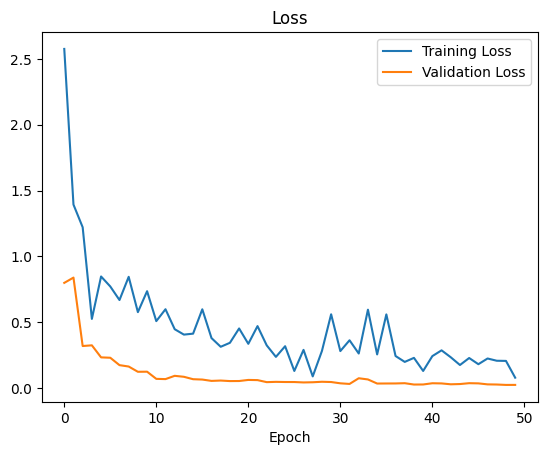

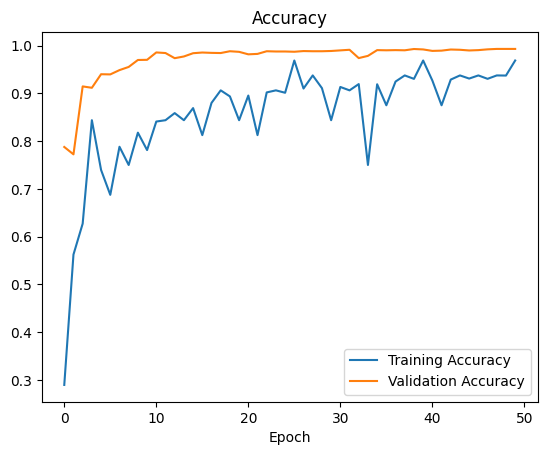

In [28]:
# Plot training history
plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')

plt.figure(2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()



In [29]:
# Evaluate the model
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_score[0])
print('Test Accuracy:', test_score[1])

Test Loss: 0.02759951911866665
Test Accuracy: 0.9916666746139526


In [30]:
# Save the model
model.save("traffic_sign_model.h5")
print("Model saved as traffic_sign_model.h5")

Model saved as traffic_sign_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


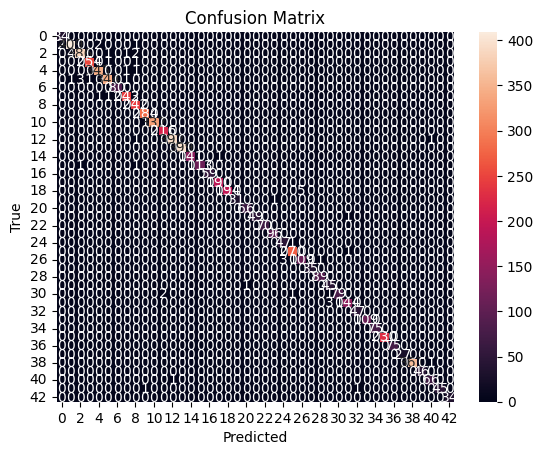

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       0.99      0.99      0.99       414
           2       0.99      0.98      0.98       394
           3       1.00      0.99      0.99       256
           4       0.99      0.99      0.99       347
           5       0.99      0.98      0.99       350
           6       1.00      1.00      1.00        80
           7       0.99      0.98      0.99       247
           8       0.96      1.00      0.98       242
           9       0.99      1.00      1.00       284
          10       1.00      1.00      1.00       333
          11       0.99      1.00      1.00       216
          12       1.00      0.99      1.00       394
          13       1.00      1.00      1.00       399
          14       1.00      0.99      1.00       142
          15       1.00      0.98      0.99       115
          16       1.00      1.00      1.00        59
          17       0.99    

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred_classes))
